# 취약지표

- 100-(위해지표+취약지표-경감지표)

## 학교 + 학생,교직원 데이터

In [9]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns    
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

In [10]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [11]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\Users\\82105\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [12]:
a=pd.read_excel('data/서울시_학교정보.xlsx')

In [13]:
a = a.drop(columns=['교육청','Unnamed: 3', 'Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 14'], axis=1)

In [14]:
new_df=a.iloc[0:320]
new_df

,구,학교명,학급수,학생수,학급당평균학생수,교원수
0,강남구,국립국악고등학교,15.0,442.0,29.466667,47.0
1,금천구,국립전통예술고등학교,18.0,525.0,29.166667,44.0
2,성북구,서울대학교사범대학부설고등학교,27.0,763.0,28.259259,71.0
3,송파구,가락고등학교,33.0,832.0,25.212121,77.0
4,서대문구,가재울고등학교,27.0,693.0,25.666667,65.0
...,...,...,...,...,...,...
315,강서구,화곡고등학교,30.0,838.0,27.933333,63.0
316,강서구,화곡보건경영고등학교,24.0,486.0,20.250000,51.0
317,중구,환일고등학교,30.0,762.0,25.400000,69.0
318,동대문구,휘경여자고등학교,33.0,851.0,25.787879,71.0


In [15]:
new_df[new_df['학교명']== '단국공업고등학교']

,구,학교명,학급수,학생수,학급당평균학생수,교원수


In [16]:
academy = pd. read_csv('data/구별_학원수.txt',sep = "\t")
academy=academy.drop(['기간','초·중·고 학생수','학생1만명당 사설학원수'],axis=1)
academy=academy.iloc[1:]
academy

,자치구,사설학원수
1,종로구,243
2,중구,109
3,용산구,154
4,성동구,289
5,광진구,405
6,동대문구,350
7,중랑구,262
8,성북구,439
9,강북구,206
10,도봉구,297


In [17]:
new_df1=pd.merge(new_df, academy, left_on = '구', right_on = '자치구', how = 'inner')
new_df1=new_df1.drop(['구'],axis=1)

In [18]:
new_df1

,학교명,학급수,학생수,학급당평균학생수,교원수,자치구,사설학원수
0,국립국악고등학교,15.0,442.0,29.466667,47.0,강남구,"2,361"
1,개포고등학교,30.0,643.0,21.433333,72.0,강남구,"2,361"
2,경기고등학교,45.0,1214.0,26.977778,101.0,강남구,"2,361"
3,경기여자고등학교,43.0,1141.0,26.534884,98.0,강남구,"2,361"
4,서울로봇고등학교,24.0,460.0,19.166667,76.0,강남구,"2,361"
...,...,...,...,...,...,...,...
315,동국대학교사범대학부속고등학교,33.0,949.0,28.757576,73.0,동대문구,350
316,정화여자상업고등학교,19.0,334.0,17.578947,43.0,동대문구,350
317,해성국제컨벤션고등학교,27.0,635.0,23.518519,61.0,동대문구,350
318,해성여자고등학교,27.0,673.0,24.925926,58.0,동대문구,350


In [19]:
new_df1.corr()

,학급수,학생수,학급당평균학생수,교원수
학급수,1.000000,0.890153,0.299327,0.916006
학생수,0.890153,1.000000,0.683150,0.763824
학급당평균학생수,0.299327,0.683150,1.000000,0.177689
교원수,0.916006,0.763824,0.177689,1.000000


In [20]:
new_df1.groupby('자치구').mean()

,학급수,학생수,학급당평균학생수,교원수
자치구,,,,
강남구,32.954545,841.545455,25.011252,74.863636
강동구,32.571429,804.000000,24.415905,71.000000
강북구,30.571429,791.714286,25.577277,66.571429
강서구,28.000000,696.347826,24.618181,61.565217
관악구,24.117647,569.176471,23.607223,54.764706
광진구,31.888889,849.000000,26.713865,67.333333
구로구,26.928571,688.142857,25.299866,62.142857
금천구,30.333333,715.333333,23.930556,68.833333
노원구,34.120000,852.520000,24.864769,78.280000


## 전출입데이터 

In [21]:
data = pd.read_csv('data/2019년도_전출입_학업중단.csv')
data

,시도교육청,지역교육청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,고등부1학년 전입학생수,...,고등부1학년 전체학생수,고등부2학년 전입학생수,고등부2학년 전출학생수,고등부2학년 전체학생수,고등부3학년 전입학생수,고등부3학년 전출학생수,고등부3학년 전체학생수,전입학생수(계),전출학생수(계),전체학생수(계)
0,서울특별시교육청,교육부,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,0.0,...,151.0,0.0,2.0,144.0,0.0,0.0,142.0,0.0,5.0,437.0
1,서울특별시교육청,교육부,서울특별시 성북구,S000003561,서울대학교사범대학부설고등학교,4,국립,N,NaN,12.0,...,235.0,4.0,3.0,278.0,0.0,0.0,299.0,16.0,8.0,812.0
2,서울특별시교육청,교육부,서울특별시 금천구,S000005401,국립전통예술고등학교,4,국립,N,NaN,0.0,...,179.0,0.0,3.0,173.0,0.0,0.0,177.0,0.0,7.0,529.0
3,서울특별시교육청,서울특별시교육청,서울특별시 송파구,S010000370,가락고등학교,4,공립,N,NaN,12.0,...,260.0,11.0,5.0,290.0,0.0,0.0,344.0,23.0,12.0,894.0
4,서울특별시교육청,서울특별시교육청,서울특별시 강동구,S010000371,강동고등학교,4,사립,N,NaN,7.0,...,188.0,4.0,2.0,223.0,0.0,0.0,297.0,11.0,8.0,708.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000157,제주고등학교,4,공립,N,NaN,12.0,...,305.0,12.0,12.0,318.0,1.0,0.0,347.0,25.0,27.0,970.0
2393,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 서귀포시,S170000158,서귀포산업과학고등학교,4,공립,N,NaN,1.0,...,162.0,1.0,4.0,149.0,0.0,1.0,165.0,2.0,18.0,476.0
2394,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 서귀포시,S170000159,성산고등학교,4,공립,N,NaN,7.0,...,96.0,4.0,11.0,112.0,1.0,2.0,87.0,12.0,25.0,295.0
2395,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,0.0,...,102.0,1.0,1.0,96.0,0.0,0.0,97.0,1.0,7.0,295.0


In [22]:
data=data.iloc[:325]
data

,시도교육청,지역교육청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,고등부1학년 전입학생수,...,고등부1학년 전체학생수,고등부2학년 전입학생수,고등부2학년 전출학생수,고등부2학년 전체학생수,고등부3학년 전입학생수,고등부3학년 전출학생수,고등부3학년 전체학생수,전입학생수(계),전출학생수(계),전체학생수(계)
0,서울특별시교육청,교육부,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,0.0,...,151.0,0.0,2.0,144.0,0.0,0.0,142.0,0.0,5.0,437.0
1,서울특별시교육청,교육부,서울특별시 성북구,S000003561,서울대학교사범대학부설고등학교,4,국립,N,NaN,12.0,...,235.0,4.0,3.0,278.0,0.0,0.0,299.0,16.0,8.0,812.0
2,서울특별시교육청,교육부,서울특별시 금천구,S000005401,국립전통예술고등학교,4,국립,N,NaN,0.0,...,179.0,0.0,3.0,173.0,0.0,0.0,177.0,0.0,7.0,529.0
3,서울특별시교육청,서울특별시교육청,서울특별시 송파구,S010000370,가락고등학교,4,공립,N,NaN,12.0,...,260.0,11.0,5.0,290.0,0.0,0.0,344.0,23.0,12.0,894.0
4,서울특별시교육청,서울특별시교육청,서울특별시 강동구,S010000371,강동고등학교,4,사립,N,NaN,7.0,...,188.0,4.0,2.0,223.0,0.0,0.0,297.0,11.0,8.0,708.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,서울특별시교육청,서울특별시교육청,서울특별시 성북구,S010002501,경동고등학교부설방송통신고등학교,11,공립,N,NaN,2.0,...,115.0,4.0,5.0,115.0,1.0,3.0,154.0,7.0,10.0,384.0
321,서울특별시교육청,서울특별시교육청,서울특별시 종로구,S010002502,경복고등학교부설방송통신고등학교,11,공립,N,NaN,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
322,서울특별시교육청,서울특별시교육청,서울특별시 동작구,S010002503,수도여자고등학교부설방송통신고등학교,11,공립,N,NaN,0.0,...,74.0,0.0,0.0,62.0,0.0,0.0,89.0,0.0,2.0,225.0
323,서울특별시교육청,서울특별시교육청,서울특별시 동작구,S010002504,영등포고등학교부설방송통신고등학교,11,공립,N,NaN,3.0,...,84.0,7.0,2.0,110.0,4.0,1.0,114.0,14.0,3.0,308.0


In [23]:
kk=pd.merge(new_df1,data, on='학교명',how='outer')

In [24]:
kk.tail()

,학교명,학급수,학생수,학급당평균학생수,교원수,자치구,사설학원수,시도교육청,지역교육청,지역,...,고등부1학년 전체학생수,고등부2학년 전입학생수,고등부2학년 전출학생수,고등부2학년 전체학생수,고등부3학년 전입학생수,고등부3학년 전출학생수,고등부3학년 전체학생수,전입학생수(계),전출학생수(계),전체학생수(계)
320,경동고등학교부설방송통신고등학교,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시교육청,서울특별시교육청,서울특별시 성북구,...,115.0,4.0,5.0,115.0,1.0,3.0,154.0,7.0,10.0,384.0
321,경복고등학교부설방송통신고등학교,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시교육청,서울특별시교육청,서울특별시 종로구,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
322,수도여자고등학교부설방송통신고등학교,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시교육청,서울특별시교육청,서울특별시 동작구,...,74.0,0.0,0.0,62.0,0.0,0.0,89.0,0.0,2.0,225.0
323,영등포고등학교부설방송통신고등학교,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시교육청,서울특별시교육청,서울특별시 동작구,...,84.0,7.0,2.0,110.0,4.0,1.0,114.0,14.0,3.0,308.0
324,경기여자고등학교부설방송통신고등학교,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시교육청,서울특별시교육청,서울특별시 강남구,...,130.0,3.0,0.0,104.0,1.0,0.0,118.0,6.0,2.0,352.0


In [25]:
mm=pd.merge(new_df1,data, on='학교명',how='inner')
mm.tail()

,학교명,학급수,학생수,학급당평균학생수,교원수,자치구,사설학원수,시도교육청,지역교육청,지역,...,고등부1학년 전체학생수,고등부2학년 전입학생수,고등부2학년 전출학생수,고등부2학년 전체학생수,고등부3학년 전입학생수,고등부3학년 전출학생수,고등부3학년 전체학생수,전입학생수(계),전출학생수(계),전체학생수(계)
315,동국대학교사범대학부속고등학교,33.0,949.0,28.757576,73.0,동대문구,350,서울특별시교육청,서울특별시교육청,서울특별시 동대문구,...,289.0,8.0,8.0,352.0,1.0,2.0,410.0,33.0,20.0,1051.0
316,정화여자상업고등학교,19.0,334.0,17.578947,43.0,동대문구,350,서울특별시교육청,서울특별시교육청,서울특별시 동대문구,...,109.0,1.0,5.0,131.0,0.0,0.0,158.0,5.0,7.0,398.0
317,해성국제컨벤션고등학교,27.0,635.0,23.518519,61.0,동대문구,350,서울특별시교육청,서울특별시교육청,서울특별시 동대문구,...,220.0,0.0,9.0,216.0,0.0,0.0,227.0,4.0,18.0,663.0
318,해성여자고등학교,27.0,673.0,24.925926,58.0,동대문구,350,서울특별시교육청,서울특별시교육청,서울특별시 동대문구,...,217.0,6.0,3.0,230.0,0.0,0.0,298.0,16.0,6.0,745.0
319,휘경여자고등학교,33.0,851.0,25.787879,71.0,동대문구,350,서울특별시교육청,서울특별시교육청,서울특별시 동대문구,...,278.0,5.0,11.0,306.0,0.0,0.0,355.0,13.0,23.0,939.0


- inner로 하면 320 학교


기존의 320개 학교로 유지하겠음

In [26]:
data.columns

Index(['시도교육청', '지역교육청', '지역', '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부',
       '제외사유', '고등부1학년 전입학생수', '고등부1학년 전출학생수', '고등부1학년 전체학생수', '고등부2학년 전입학생수',
       '고등부2학년 전출학생수', '고등부2학년 전체학생수', '고등부3학년 전입학생수', '고등부3학년 전출학생수',
       '고등부3학년 전체학생수', '전입학생수(계)', '전출학생수(계)', '전체학생수(계)'],
      dtype='object')

In [27]:
Student_Trans=data[['학교명','전입학생수(계)','전출학생수(계)']]
Student_Trans

,학교명,전입학생수(계),전출학생수(계)
0,국립국악고등학교,0.0,5.0
1,서울대학교사범대학부설고등학교,16.0,8.0
2,국립전통예술고등학교,0.0,7.0
3,가락고등학교,23.0,12.0
4,강동고등학교,11.0,8.0
...,...,...,...
320,경동고등학교부설방송통신고등학교,7.0,10.0
321,경복고등학교부설방송통신고등학교,1.0,2.0
322,수도여자고등학교부설방송통신고등학교,0.0,2.0
323,영등포고등학교부설방송통신고등학교,14.0,3.0


In [28]:
new_data =pd.merge(new_df1,Student_Trans, on='학교명',how='inner')
new_data

,학교명,학급수,학생수,학급당평균학생수,교원수,자치구,사설학원수,전입학생수(계),전출학생수(계)
0,국립국악고등학교,15.0,442.0,29.466667,47.0,강남구,"2,361",0.0,5.0
1,개포고등학교,30.0,643.0,21.433333,72.0,강남구,"2,361",10.0,11.0
2,경기고등학교,45.0,1214.0,26.977778,101.0,강남구,"2,361",36.0,27.0
3,경기여자고등학교,43.0,1141.0,26.534884,98.0,강남구,"2,361",21.0,18.0
4,서울로봇고등학교,24.0,460.0,19.166667,76.0,강남구,"2,361",0.0,5.0
...,...,...,...,...,...,...,...,...,...
315,동국대학교사범대학부속고등학교,33.0,949.0,28.757576,73.0,동대문구,350,33.0,20.0
316,정화여자상업고등학교,19.0,334.0,17.578947,43.0,동대문구,350,5.0,7.0
317,해성국제컨벤션고등학교,27.0,635.0,23.518519,61.0,동대문구,350,4.0,18.0
318,해성여자고등학교,27.0,673.0,24.925926,58.0,동대문구,350,16.0,6.0


In [30]:
new_data.isnull().sum()

학교명         0
학급수         0
학생수         0
학급당평균학생수    0
교원수         0
자치구         0
사설학원수       0
전입학생수(계)    0
전출학생수(계)    0
dtype: int64

In [31]:
new_data.corr()

,학급수,학생수,학급당평균학생수,교원수,전입학생수(계),전출학생수(계)
학급수,1.000000,0.890153,0.299327,0.916006,0.315025,0.301954
학생수,0.890153,1.000000,0.683150,0.763824,0.410114,0.342725
학급당평균학생수,0.299327,0.683150,1.000000,0.177689,0.325095,0.235403
교원수,0.916006,0.763824,0.177689,1.000000,0.226929,0.260037
전입학생수(계),0.315025,0.410114,0.325095,0.226929,1.000000,0.386182
전출학생수(계),0.301954,0.342725,0.235403,0.260037,0.386182,1.000000


In [32]:
new_data.isnull().sum()

학교명         0
학급수         0
학생수         0
학급당평균학생수    0
교원수         0
자치구         0
사설학원수       0
전입학생수(계)    0
전출학생수(계)    0
dtype: int64

#### 전출,전입 학생수에 결측치가 있음, 차후에 반드시 검토하자

## 생활환경 데이터

In [33]:
life_Environment = pd.read_csv('data/서울시_생활환경_만족도_통계.txt',sep = '\t')
life_Environment

,기간,대분류,분류,주거환경,경제환경,사회환경,교육환경
0,2011,서울시,서울시,6.10,5.18,5.53,5.28
1,2011,성별,남자,6.16,5.36,5.64,5.37
2,2011,성별,여자,5.88,4.54,5.12,4.94
3,2011,연령별,20대 이하,5.50,4.29,4.70,4.80
4,2011,연령별,30대,6.03,5.24,5.55,5.19
...,...,...,...,...,...,...,...
595,2020,관악구,관악구,6.16,5.24,5.81,5.63
596,2020,서초구,서초구,6.59,5.24,6.06,5.88
597,2020,강남구,강남구,6.44,5.38,6.27,5.84
598,2020,송파구,송파구,6.48,5.39,6.07,5.87


2020년도만 사용

In [34]:
life_Environment=life_Environment[life_Environment['기간']==2020]
life_Environment

,기간,대분류,분류,주거환경,경제환경,사회환경,교육환경
540,2020,서울시,서울시,6.36,5.35,5.99,5.69
541,2020,성별,남자,6.41,5.41,6.00,5.71
542,2020,성별,여자,6.26,5.22,5.98,5.66
543,2020,연령별,20대 이하,6.03,5.02,5.91,5.59
544,2020,연령별,30대,5.99,5.00,5.67,5.51
545,2020,연령별,40대,6.17,5.01,5.81,5.48
546,2020,연령별,50대,6.42,5.41,6.00,5.70
547,2020,연령별,60대 이상,6.74,5.82,6.31,5.96
548,2020,학력별,중졸 이하,6.63,5.61,6.25,5.83
549,2020,학력별,고졸 이하,6.36,5.39,5.99,5.76


구별 데이터만 추출

In [35]:
life_Environment=life_Environment.loc[575:]
life_Environment

,기간,대분류,분류,주거환경,경제환경,사회환경,교육환경
575,2020,종로구,종로구,6.10,5.19,5.76,5.67
576,2020,중구,중구,6.43,5.52,6.01,5.51
577,2020,용산구,용산구,6.41,5.34,5.94,5.77
578,2020,성동구,성동구,6.30,5.09,5.95,5.63
579,2020,광진구,광진구,6.03,5.09,5.94,5.70
580,2020,동대문구,동대문구,6.10,5.16,5.86,5.55
581,2020,중랑구,중랑구,6.52,5.53,5.91,5.52
582,2020,성북구,성북구,6.45,5.23,6.06,5.60
583,2020,강북구,강북구,6.22,5.25,5.88,5.52
584,2020,도봉구,도봉구,6.31,5.37,5.89,5.55


In [36]:
life_Environment=life_Environment[['대분류','주거환경','경제환경','사회환경','교육환경']]
life_Environment

,대분류,주거환경,경제환경,사회환경,교육환경
575,종로구,6.10,5.19,5.76,5.67
576,중구,6.43,5.52,6.01,5.51
577,용산구,6.41,5.34,5.94,5.77
578,성동구,6.30,5.09,5.95,5.63
579,광진구,6.03,5.09,5.94,5.70
580,동대문구,6.10,5.16,5.86,5.55
581,중랑구,6.52,5.53,5.91,5.52
582,성북구,6.45,5.23,6.06,5.60
583,강북구,6.22,5.25,5.88,5.52
584,도봉구,6.31,5.37,5.89,5.55


In [37]:
new_data1 = pd.merge(new_data,life_Environment,left_on = '자치구', right_on = '대분류')
new_data1

,학교명,학급수,학생수,학급당평균학생수,교원수,자치구,사설학원수,전입학생수(계),전출학생수(계),대분류,주거환경,경제환경,사회환경,교육환경
0,국립국악고등학교,15.0,442.0,29.466667,47.0,강남구,"2,361",0.0,5.0,강남구,6.44,5.38,6.27,5.84
1,개포고등학교,30.0,643.0,21.433333,72.0,강남구,"2,361",10.0,11.0,강남구,6.44,5.38,6.27,5.84
2,경기고등학교,45.0,1214.0,26.977778,101.0,강남구,"2,361",36.0,27.0,강남구,6.44,5.38,6.27,5.84
3,경기여자고등학교,43.0,1141.0,26.534884,98.0,강남구,"2,361",21.0,18.0,강남구,6.44,5.38,6.27,5.84
4,서울로봇고등학교,24.0,460.0,19.166667,76.0,강남구,"2,361",0.0,5.0,강남구,6.44,5.38,6.27,5.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,동국대학교사범대학부속고등학교,33.0,949.0,28.757576,73.0,동대문구,350,33.0,20.0,동대문구,6.10,5.16,5.86,5.55
316,정화여자상업고등학교,19.0,334.0,17.578947,43.0,동대문구,350,5.0,7.0,동대문구,6.10,5.16,5.86,5.55
317,해성국제컨벤션고등학교,27.0,635.0,23.518519,61.0,동대문구,350,4.0,18.0,동대문구,6.10,5.16,5.86,5.55
318,해성여자고등학교,27.0,673.0,24.925926,58.0,동대문구,350,16.0,6.0,동대문구,6.10,5.16,5.86,5.55


In [38]:
new_data1.corr()

,학급수,학생수,학급당평균학생수,교원수,전입학생수(계),전출학생수(계),주거환경,경제환경,사회환경,교육환경
학급수,1.000000,0.890153,0.299327,0.916006,0.315025,0.301954,0.122296,0.060798,0.196025,0.205587
학생수,0.890153,1.000000,0.683150,0.763824,0.410114,0.342725,0.100465,0.065093,0.166947,0.166384
학급당평균학생수,0.299327,0.683150,1.000000,0.177689,0.325095,0.235403,0.029224,0.043445,0.046514,0.036330
교원수,0.916006,0.763824,0.177689,1.000000,0.226929,0.260037,0.128950,0.046981,0.182830,0.205253
전입학생수(계),0.315025,0.410114,0.325095,0.226929,1.000000,0.386182,-0.002736,-0.013163,0.048015,0.106831
전출학생수(계),0.301954,0.342725,0.235403,0.260037,0.386182,1.000000,-0.057289,-0.066939,-0.026466,0.061381
주거환경,0.122296,0.100465,0.029224,0.128950,-0.002736,-0.057289,1.000000,0.544610,0.610195,0.371303
경제환경,0.060798,0.065093,0.043445,0.046981,-0.013163,-0.066939,0.544610,1.000000,0.263616,0.217567
사회환경,0.196025,0.166947,0.046514,0.182830,0.048015,-0.026466,0.610195,0.263616,1.000000,0.598433
교육환경,0.205587,0.166384,0.036330,0.205253,0.106831,0.061381,0.371303,0.217567,0.598433,1.000000


In [39]:
new_data1.to_csv('data/new_data1.csv',index=False)

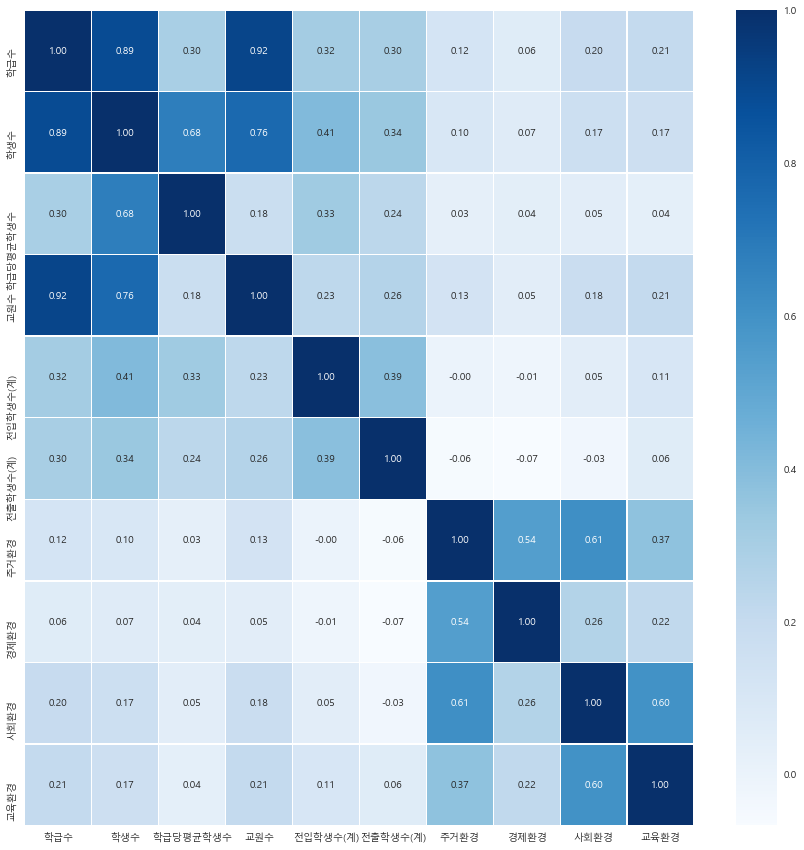

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(data = new_data1.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')